In [1]:
!git clone https://github.com/h102vbzxcc1/py-homework.git

Cloning into 'py-homework'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 105 (delta 41), reused 77 (delta 23), pack-reused 0
Receiving objects: 100% (105/105), 141.78 KiB | 412.00 KiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
import seaborn as sns
import math
import warnings

--2023-01-07 09:38:47--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.23.101, 74.125.23.102, 74.125.23.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9u30orjtps9tnqu8nhvi6m4vlh174m84/1673084325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=128e53e7-d7fa-47a1-bf3b-cfbaae29ae93 [following]
--2023-01-07 09:38:48--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9u30orjtps9tnqu8nhvi6m4vlh174m84/1673084325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=128e53e7-d7fa-47a1-bf3b-cfbaae29ae93
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-9o-d

In [3]:
covid_area_data=pd.read_csv('/content/py-homework/data/covid_area.csv')
total_peo_data=pd.read_csv('/content/py-homework/data/total_peo.csv')
covid_aral_all=pd.read_csv('/content/py-homework/data/covid_全區.csv')
covid_area_month=pd.read_csv('/content/py-homework/data/covid_area_month.csv')
data=pd.read_csv('/content/py-homework/data/lstm_data.csv')

In [4]:
covid_area_data

,Unnamed: 0,個案公佈日,縣市別,區域,新增確診人數
0,0,2022-11-30,台北市,內湖區,163
1,1,2022-11-30,台北市,文山區,156
2,2,2022-11-30,台北市,士林區,132
3,3,2022-11-30,台北市,北投區,111
4,4,2022-11-30,台北市,大安區,117
...,...,...,...,...,...
2978,2978,2022-01-11,台北市,北投區,1
2979,2979,2022-01-10,台北市,大同區,1
2980,2980,2022-01-08,台北市,中山區,1
2981,2981,2022-01-05,台北市,萬華區,1


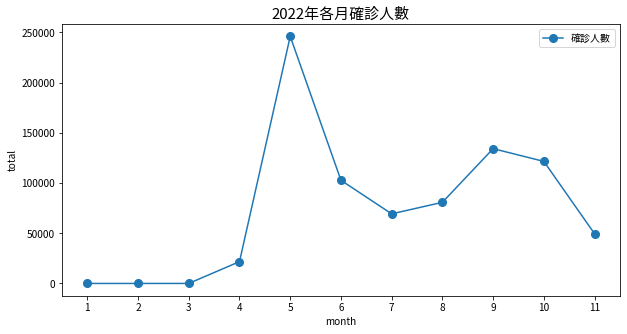

In [5]:
plt.figure(figsize=(10,5))

# # plt.style.use("ggplot")
plt.xlabel("month", fontweight = "bold")
plt.ylabel("total", fontweight = "bold")   
plt.title("2022年各月確診人數",fontsize = 15, fontweight = "bold")
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.plot(covid_area_month["月份"],covid_area_month["新增確診人數"],markersize="16", marker=".",label="確診人數")
plt.legend(loc='best')
plt.savefig("2022年各月確診人數.jpg",
            bbox_inches='tight',            
            pad_inches=0.0)                 
plt.show()
plt.close()

In [6]:
df_list = [ covid_area_month,total_peo_data]
print(df_list)
df = pd.merge(df_list[0],df_list[1],on='月份')

[    月份  新增確診人數
0    1      24
1    2      26
2    3      35
3    4   21730
4    5  245943
5    6  102696
6    7   69289
7    8   80767
8    9  134179
9   10  121490
10  11   49442,     月份       合計        男        女
0    1  2514425  1197417  1317008
1    2  2504597  1192907  1311690
2    3  2490445  1186053  1304392
3    4  2478124  1179782  1298342
4    5  2470599  1175883  1294716
5    6  2464452  1172552  1291900
6    7  2462482  1171248  1291234
7    8  2461695  1170539  1291156
8    9  2460932  1169771  1291161
9   10  2465610  1171422  1294188
10  11  2472547  1173910  1298637]


In [7]:
df

,月份,新增確診人數,合計,男,女
0,1,24,2514425,1197417,1317008
1,2,26,2504597,1192907,1311690
2,3,35,2490445,1186053,1304392
3,4,21730,2478124,1179782,1298342
4,5,245943,2470599,1175883,1294716
5,6,102696,2464452,1172552,1291900
6,7,69289,2462482,1171248,1291234
7,8,80767,2461695,1170539,1291156
8,9,134179,2460932,1169771,1291161
9,10,121490,2465610,1171422,1294188


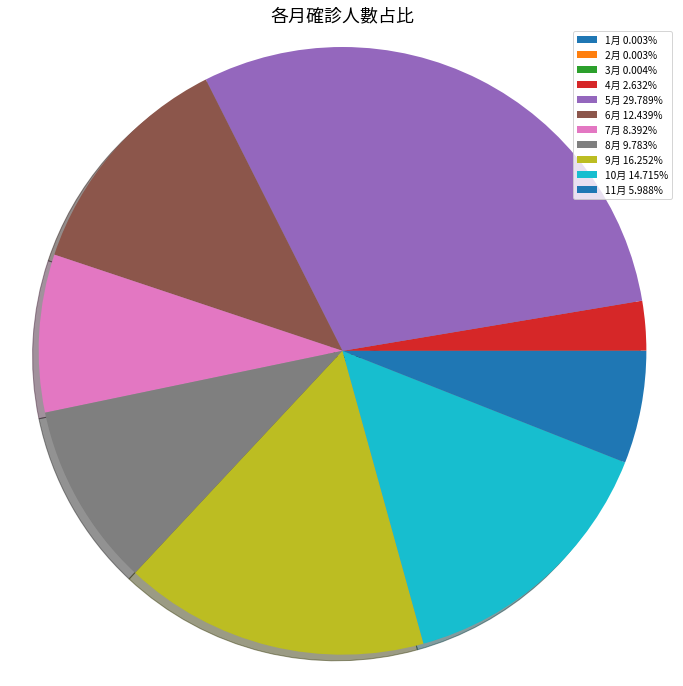

In [8]:
plt.figure(figsize=(12,12))

labels = []
total = sum(df['新增確診人數'])
for i in range(len(df['月份'])):
  labels.append("%s月 %1.1f%%" % (df['月份'][i],(df['新增確診人數'][i])))
  


plt.pie(df['新增確診人數'],pctdistance = 0.6,textprops = {"fontsize" : 12},shadow=True)
# plt.pie(df['新增確診人數'],autopct = "%1.1f%%",pctdistance = 0.6,textprops = {"fontsize" : 12},shadow=True)
plt.axis('equal')
                           
plt.title("各月確診人數占比", {"fontsize" : 18})
plt.legend(loc = "best",labels=["%s月 %1.3f%%" % ( l, (float(s) / total) * 100) for l, s in zip(df['月份'], df['新增確診人數'])])
# save image
plt.savefig("Pie chart of car accident.jpg",
            bbox_inches='tight',            
            pad_inches=0.0)                 
plt.show()
plt.close()


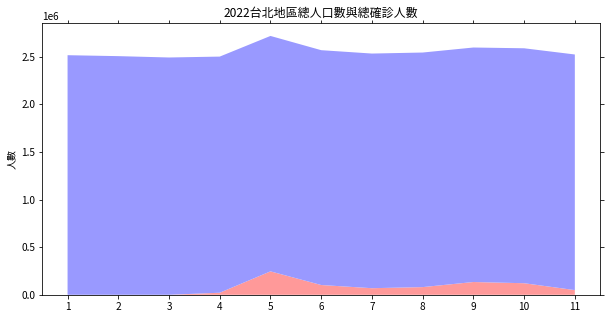

In [9]:
plt.figure(figsize=(10,5))
# 定义各区块面积的含义
colors = ['#ff9999','#9999ff']
# 绘制面积图
plt.stackplot(df['月份'], # x轴
              df['新增確診人數'],df['合計'], # 可变参数，接受多个y
              colors = colors # 设置各区块的填充色
             )

# 添加标题和坐标轴标签
plt.title('2022台北地區總人口數與總確診人數')
plt.ylabel('人數')
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')
# 显示图形
plt.savefig("2022台北地區總人口數與總確診人數.jpg",
            bbox_inches='tight',            
            pad_inches=0.0)                 
plt.show()
plt.close()

In [10]:
result = np.corrcoef(df['新增確診人數'],df['合計'])

count      286.000000
mean      2886.786713
std       2445.219485
min          1.000000
25%       1254.750000
50%       2487.000000
75%       4226.000000
max      11246.000000
Name: 新增確診人數, dtype: float64

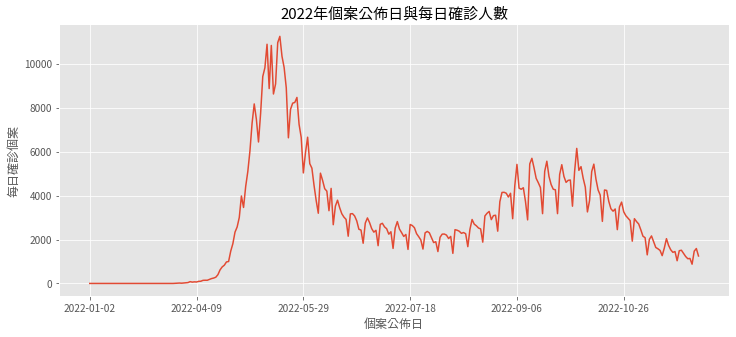

In [11]:
plt.figure(figsize=(12,5))
plt.style.use("ggplot")
display(covid_area_data.groupby('個案公佈日')['新增確診人數'].sum().describe())
view=covid_area_data.groupby('個案公佈日')['新增確診人數'].sum().plot()
plt.ylabel('每日確診個案')
plt.title("2022年個案公佈日與每日確診人數",fontsize = 15, fontweight = "bold")
plt.savefig("2022年個案公佈日與每日確診人數.jpg",
            bbox_inches='tight',            
            pad_inches=0.0)                 
plt.show()
plt.close()

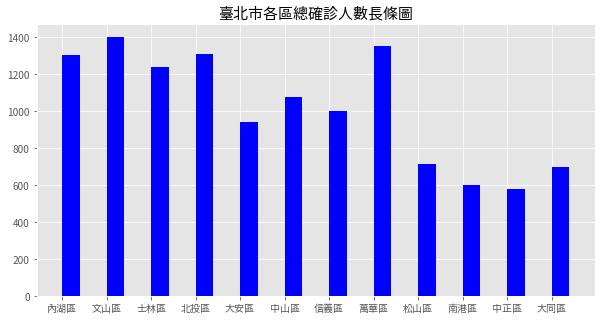

In [12]:
plt.figure(figsize=(10,5))
plt.title("臺北市各區總確診人數長條圖",fontsize = 15, fontweight = "bold")
plt.bar(covid_area_data['區域'],covid_area_data['新增確診人數'],color='b',width=0.4, align='edge')  # 第一組數據靠左邊緣對齊
plt.savefig("臺北市各區總確診人數長條圖.jpg",
            bbox_inches='tight',            
            pad_inches=0.0)                 
plt.show()
plt.close()